In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
problems = [
    ("Forrester", {}),
    ("Levy", {}),
    ("Hartmann6", {})
]

methods = {
    #"EI": "EI",
    #"UCB": "UCB",
    #"EICostRatio": "EICostRatio",
    #"UCBCostRatio": "UCBCostRatio"
    #"HardLocalPenalisationBatchBOCost": "HardLocalPenalisationBatchBOCost",
    "LocalPenalisationBatchBOCost": "LocalPenalisationBatchBOCost"
}

bo_names = {
    #"EI": "AsyncBO",
    #"UCB": "AsyncBO",
    #"EICostRatio": "AsyncCostAcqBO",
    #"UCBCostRatio": "AsyncCostAcqBO",
    "HardLocalPenalisationBatchBOCost": "AsyncSKBO",
    "LocalPenalisationBatchBOCost": "AsyncSKBO"
}

killing_names = [
    "NoKilling",
    "DeterministicKilling",
    "ProbabilisticKilling"
]

acq_params = {
    "n_opt_samples": 1 * 1000,
    "n_opt_bfgs": 10,
    "acq_name": "EI",
}

killing_params = {
    "NoKilling": {
        "n_opt_samples": 1 * 1000,
        "n_opt_bfgs": 10,
    },
    "DeterministicKilling": {
        "delta": 1,
        "acq_name": "",
        "acq_params": acq_params,
        "n_opt_samples": 1 * 1000,
        "n_opt_bfgs": 10,
    },
    "ProbabilisticKilling": {
        "alpha": 0.8,
        "epsilon": 1e-8,
        "n_opt_samples": 1 * 1000,
        "n_opt_bfgs": 10,
    }
}

time_functions = [
    ("corrtime", "job-dependant"),
    ("negcorrtime", "job-dependant"),
    ("consttime", "job-dependant"),
]

max_steps = 100
num_runs = 21
workers = [2, 4, 8]

In [4]:

import numpy as np
from aegis.gen_training_data import generate_training_data_LHS
from aegis.optim import perform_optimisation

for problem_name, problem_params in problems:

    # Initial point generation
    generate_training_data_LHS(problem_name, n_exp_start=1, n_exp_end=num_runs)

    for time_name, interface in time_functions:

        for n_workers in workers:

            for acq_name in methods:

                bo_name = bo_names[acq_name]

                for kill_name in killing_names:

                    kill_params = killing_params[kill_name]

                    if "acq_name" in kill_params:
                        kill_params["acq_name"] = acq_name

                    for run in range(num_runs):
                        """
                        perform_optimisation(
                            problem_name=problem_name,
                            problem_params=problem_params,
                            run_no=run+1,
                            budget=max_steps,
                            n_workers=n_workers,
                            acq_name=acq_name,
                            acq_params=acq_params,
                            time_name=time_name,
                            save_every=10,
                            repeat_no=None,
                            bo_name=bo_name,
                            kill_name=kill_name,
                            killing_params=kill_params,
                        )"""

File exists, skipping: data/Forrester_001.pt
File exists, skipping: data/Forrester_002.pt
File exists, skipping: data/Forrester_003.pt
File exists, skipping: data/Forrester_004.pt
File exists, skipping: data/Forrester_005.pt
File exists, skipping: data/Forrester_006.pt
File exists, skipping: data/Forrester_007.pt
File exists, skipping: data/Forrester_008.pt
File exists, skipping: data/Forrester_009.pt
File exists, skipping: data/Forrester_010.pt
File exists, skipping: data/Forrester_011.pt
File exists, skipping: data/Forrester_012.pt
File exists, skipping: data/Forrester_013.pt
File exists, skipping: data/Forrester_014.pt
File exists, skipping: data/Forrester_015.pt
File exists, skipping: data/Forrester_016.pt
File exists, skipping: data/Forrester_017.pt
File exists, skipping: data/Forrester_018.pt
File exists, skipping: data/Forrester_019.pt
File exists, skipping: data/Forrester_020.pt
File exists, skipping: data/Forrester_021.pt
File exists, skipping: data/Levy_001.pt
File exists, sk

100%|██████████| 1701/1701 [00:02<00:00, 711.39it/s] 


corrtime Plots:


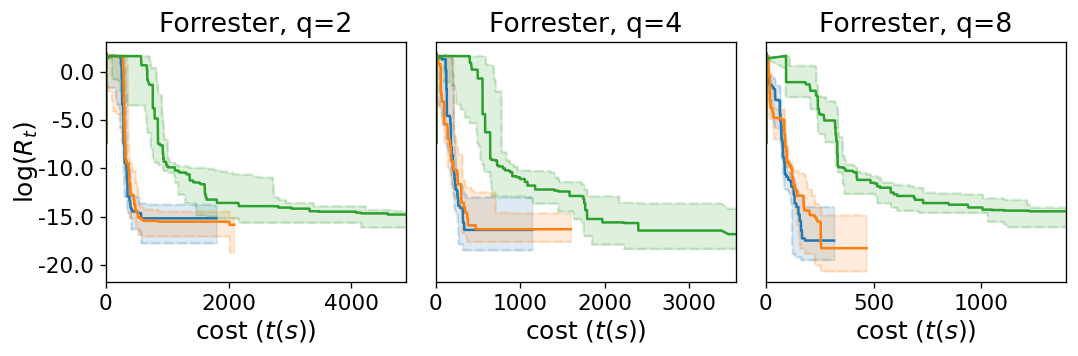

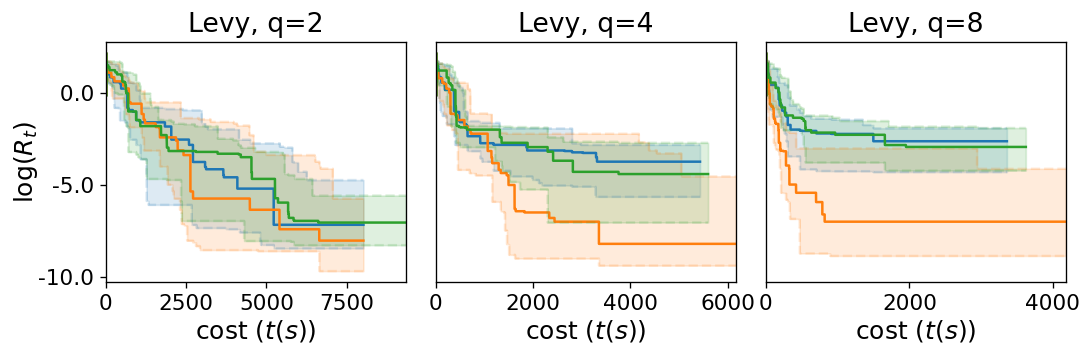

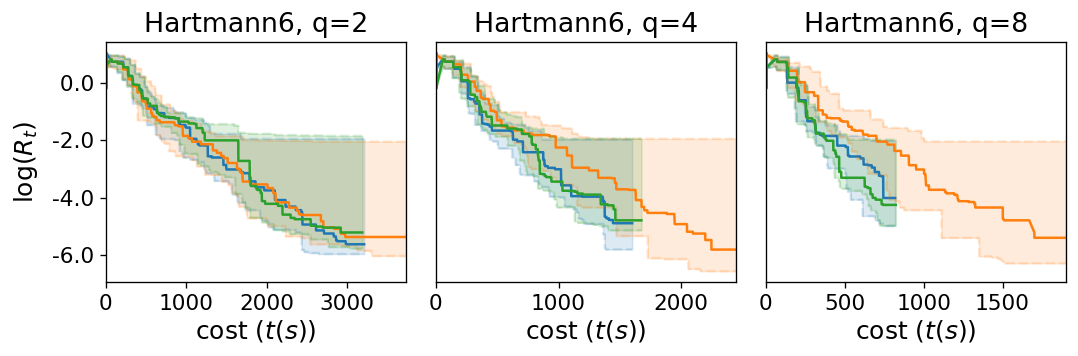

negcorrtime Plots:


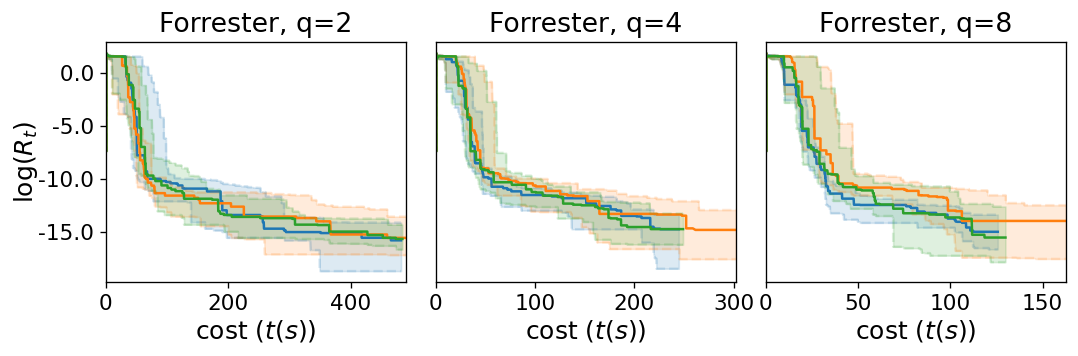

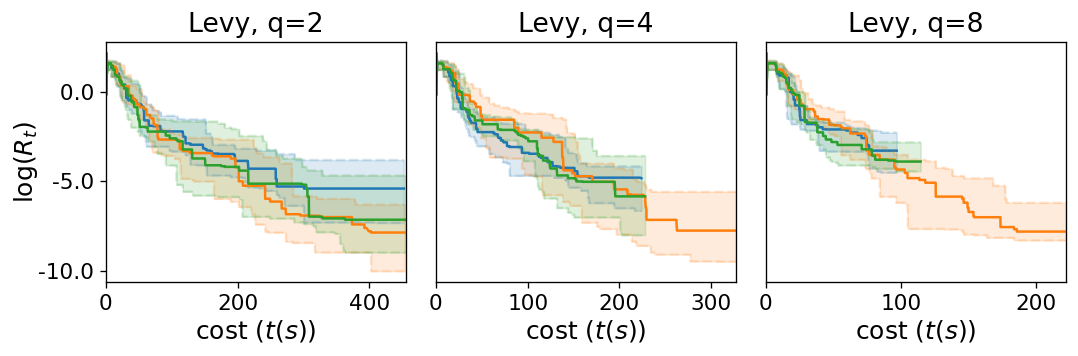

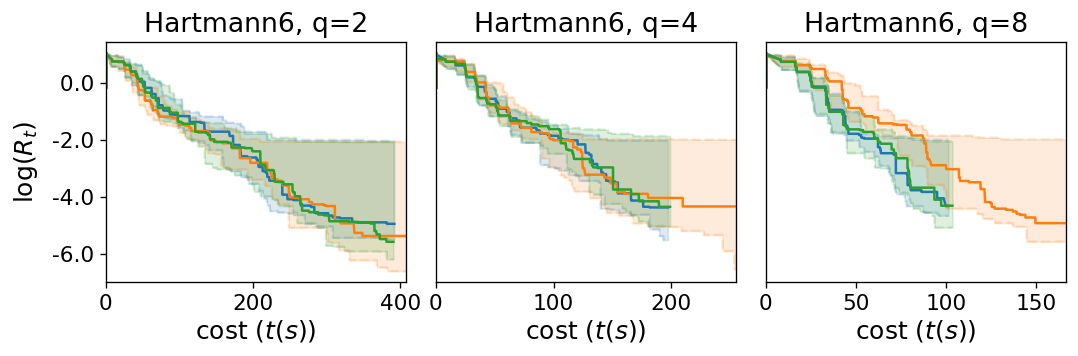

consttime Plots:


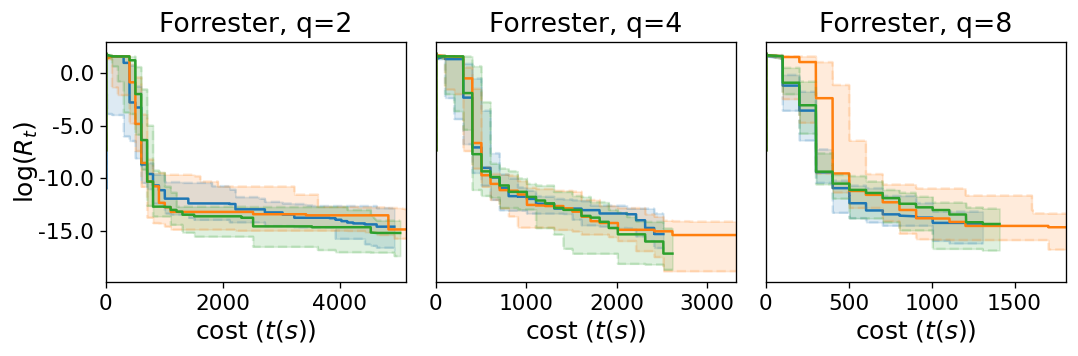

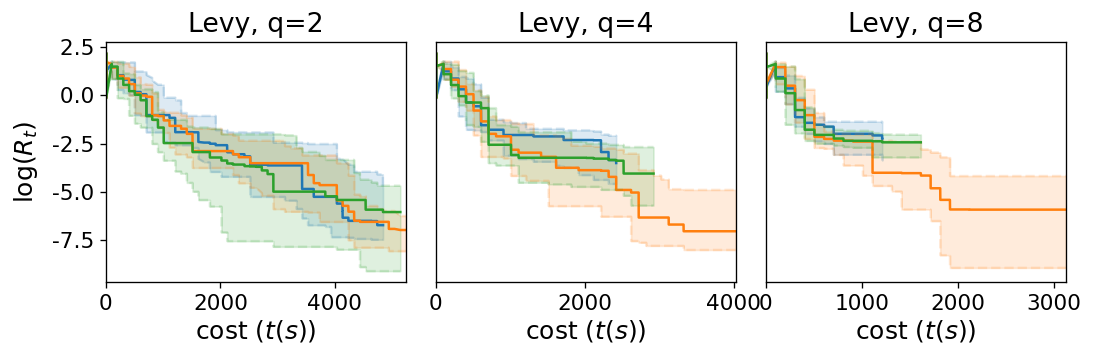

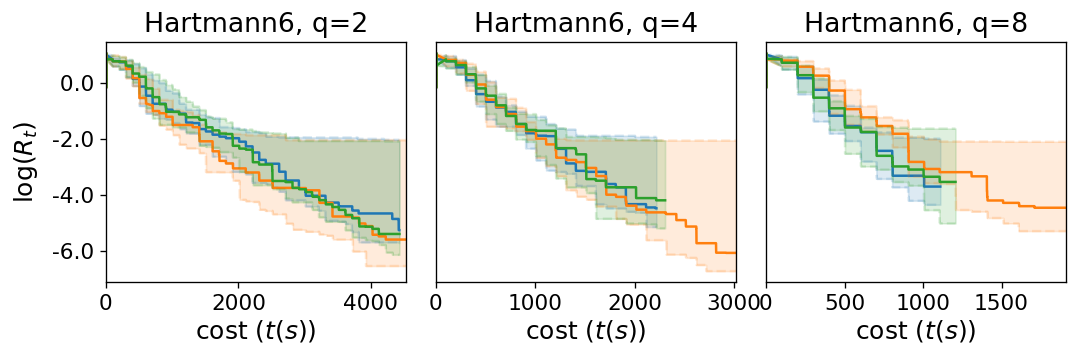

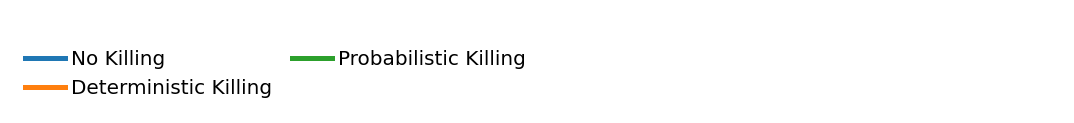

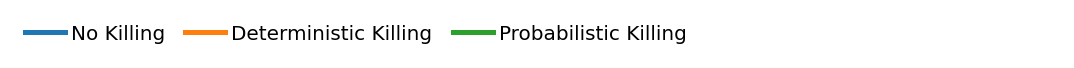

In [6]:
import aegis
from aegis import util
import numpy as np
import plotting

tag = True

list_methods = []

for acq_name in methods:

    _acq_name = acq_name

    if "d" in problem_params:
            problem_name = f'{problem_name:s}{problem_params["d"]:d}'

    if "aegis" in acq_name:
        epsilon = acq_params["epsilon"]
        try:
            eta = acq_params["eta"]
        except KeyError:
            eta = 0.5

        try:
            epsilon = f"{float(epsilon):0.2f}"
        except ValueError:
            pass
        acq_name = f"{acq_name:s}-{epsilon:s}"

        if eta != 0.5:
            acq_name += f"-{float(eta):g}"

    if "BatchBO" in acq_name:
        acq_name = f'{acq_name:s}-{acq_params["acq_name"]:s}'

    list_methods.append(acq_name)
    bo_names[acq_name] = bo_names[_acq_name]

list_killing = []

for kill_name in killing_names:
    if "DeterministicKilling" in kill_name:
        kill_name = f'{kill_name:s}{killing_params[kill_name]["delta"]:0.2f}'
    if "ProbabilisticKilling" in kill_name:
        kill_name = f'{kill_name:s}{killing_params[kill_name]["alpha"]:0.2f}'
    list_killing.append(kill_name)

D = plotting.read_in_results(
    [time_func for time_func, _ in time_functions], workers, problems, list_methods, list_killing, num_runs, max_steps, bo_names
)

TITLE_FONTSIZE = 16#19
LABEL_FONTSIZE = 15#18
TICK_FONTSIZE = 13#16

method_cols = (
    np.array(
        [
            [31, 119, 180],
            [255, 127, 14],
            [44, 160, 44],
            [214, 39, 40],
            [148, 103, 189],
            [227, 119, 194],
        ]
    )
    / 255
)

for time_func, interface in time_functions:
    print(f"{time_func} Plots:")
    plotting.make_conv_plots(
        D,
        time_func,
        problems,
        workers,
        max_steps,
        list_methods,
        method_cols,
        killing_names,
        fname_prefix=time_func,
        TITLE_FONTSIZE=TITLE_FONTSIZE,
        LABEL_FONTSIZE=LABEL_FONTSIZE,
        TICK_FONTSIZE=TICK_FONTSIZE,
        savefig=True,
    )

killing_names = [
    "No Killing",
    "Deterministic Killing",
    "Probabilistic Killing"
]
aegis.plotting.make_legend(
    killing_names, 
    method_cols,
    onecol_inds=list(range(len(killing_names))),
    twocol_inds=list(range(len(killing_names))),
    savefig=False,
    fname_prefix=None,
)

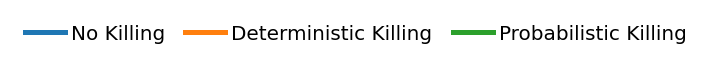

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


killing_names = [
    "No Killing",
    "Deterministic Killing",
    "Probabilistic Killing"
]

method_cols = (
    np.array(
        [
            [31, 119, 180],
            [255, 127, 14],
            [44, 160, 44],
            [214, 39, 40],
            [148, 103, 189],
            [227, 119, 194],
        ]
    )
    / 255
)

nmethods = len(killing_names)

fig, ax = plt.subplots(1, 1, figsize=(6, 1))
for method_name, color in zip(killing_names, method_cols):
    ax.plot([0, 1], [0, 1], color=color, label=method_name)

legend_options = {
    "loc": 3,
    "framealpha": 1,
    "frameon": False,
    "fontsize": 20,
    "handletextpad": 0.3,
    "columnspacing": 1,
    "ncol": nmethods,
}

legend = ax.legend(**legend_options)

# increase legend line widths
for legobj in legend.legendHandles:
    legobj.set_linewidth(5.0)

# remove all plotted lines
for _ in range(len(ax.lines)):
    ax.lines.pop(0)

fig.canvas.draw()
bbox = legend.get_window_extent()
bbox = bbox.from_extents(*[bbox.extents + np.array([-5, -5, 5, 5])])
bbox = bbox.transformed(fig.dpi_scale_trans.inverted())

ax.axis("off")

plt.show()